In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [7]:
df = pd.read_csv('titanic_toy.csv')

In [8]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [52]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [11]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [12]:
x = df.drop('Survived',axis=1)
y = df['Survived']

In [14]:
x_train ,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [15]:
x_train.shape , x_test.shape

((712, 3), (179, 3))

In [16]:
x_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [17]:
mean_age = df['Age'].mean()
median_age = df['Age'].median()

mean_fare = df['Fare'].mean()
median_fare = df['Fare'].median()

In [24]:
x_train['mean_age'] = x_train['Age'].fillna(mean_age)
x_train['median_age'] = x_train['Age'].fillna(median_age)

x_train['mean_fare'] = x_train['Fare'].fillna(mean_fare)
x_train['median_fare'] = x_train['Fare'].fillna(median_fare)

In [25]:
x_train.sample(5)

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
808,39.0,13.00,0,39.0,39.0,13.000000,13.0000
336,29.0,NaN,1,29.0,29.0,32.279338,14.4542
619,26.0,10.50,0,26.0,26.0,10.500000,10.5000
437,24.0,18.75,5,24.0,24.0,18.750000,18.7500
238,19.0,10.50,0,19.0,19.0,10.500000,10.5000


In [29]:
print('Original Age variable variance: ', x_train['Age'].var())
print('Age Variance after median imputation: ', x_train['mean_age'].var())
print('Age Variance after mean imputation: ', x_train['mean_age'].var())

print('Original Fare variable variance: ', x_train['Fare'].var())
print('Fare Variance after median imputation: ', x_train['median_fare'].var())
print('Fare Variance after mean imputation: ', x_train['mean_fare'].var())

Original Age variable variance:  204.3495133904614
Age Variance after median imputation:  161.813866455868
Age Variance after mean imputation:  161.813866455868
Original Fare variable variance:  2448.197913706318
Fare Variance after median imputation:  2340.098181126126
Fare Variance after mean imputation:  2324.2440261087


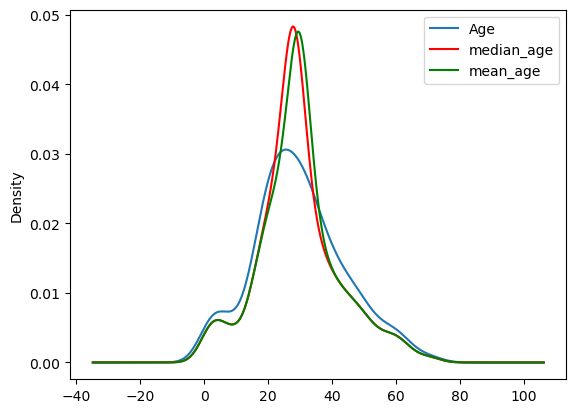

In [32]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
x_train['median_age'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
x_train['mean_age'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

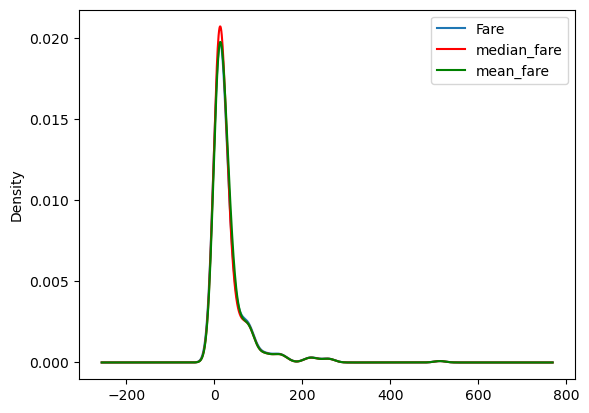

In [35]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
x_train['median_fare'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
x_train['mean_fare'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [37]:
x_train.cov()            ### age coveriance is changed but fare's not

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.631558,64.858451
Fare,70.719262,2448.197914,17.258917,55.800924,59.661820,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.143296,-5.088278,16.386748,16.476326
mean_age,204.349513,55.800924,-5.143296,161.813866,161.838181,52.948856,51.541608
median_age,204.349513,59.661820,-5.088278,161.838181,162.338530,56.613065,55.142638
mean_fare,66.631558,2448.197914,16.386748,52.948856,56.613065,2324.244026,2324.533881
median_fare,64.858451,2448.197914,16.476326,51.541608,55.142638,2324.533881,2340.098181


In [38]:
x_train.corr()

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.090109,0.087355
Fare,0.092644,1.000000,0.208268,0.088382,0.094361,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.244475,-0.241469,0.205520,0.205942
mean_age,1.000000,0.088382,-0.244475,1.000000,0.998533,0.086339,0.083759
median_age,1.000000,0.094361,-0.241469,0.998533,1.000000,0.092165,0.089466
mean_fare,0.090109,1.000000,0.205520,0.086339,0.092165,1.000000,0.996731
median_fare,0.087355,1.000000,0.205942,0.083759,0.089466,0.996731,1.000000


<Axes: >

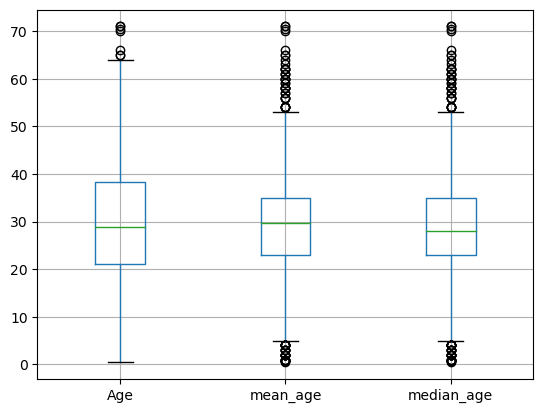

In [40]:
x_train[['Age','mean_age','median_age']].boxplot()     ### measure change in outliers 

<Axes: >

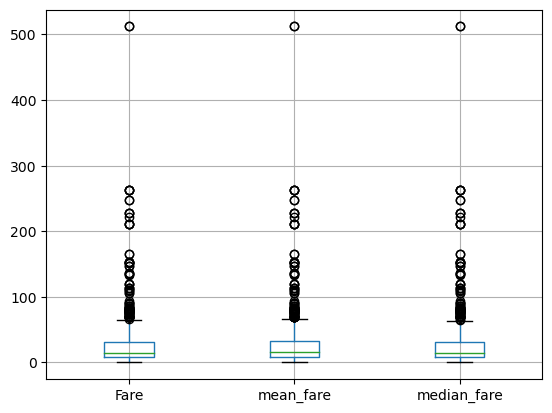

In [41]:
x_train[['Fare','mean_fare','median_fare']].boxplot()    ### no change in outliers

## Using sklearn

In [43]:

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [44]:

imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [45]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [46]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [47]:

trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [48]:

trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [49]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [50]:

X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])